## 导入必要的库

In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算

In [44]:
data_train = pd.read_csv("../input/titanic.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 一、缺失值
1. 查看缺失值： 统计缺失值数，分布
2. 数据缺失原因分析
3. 缺失值处理：
    + 缺失值删除（按行，按列[某几列]）
    + 缺失值填充 
        - **常规做法**：
            - 非时序数据：基于统计方法：众数、中位数、均值
            - 时序数据:前向、后向、插值填充等
        - **进阶做法**：基于模型方法，如KNN、随机森林等等

![缺失值](../pics/missing_data.png)
该图取自参考资料1

### 1.1. 查看缺失值数量


In [5]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.2. 查看非缺失值数量

In [6]:
data_train.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### 1.3 数据整体缺失值分布

上面的方法是孤立的去看每个字段的缺失情况。这是片面的。通常不同字段之间缺失是相关的，因此需要对数据表的整体缺失情况有一定的认识。

In [9]:
# 安装必要的包 
# !pip install missingno
import missingno as msno

更多资料参考如下：
- [A Guide to Handling Missing values in Python](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python)
- [ResidentMario/missingno](https://github.com/ResidentMario/missingno#matrix)
- [缺失值可视化处理--missingno](https://blog.csdn.net/Andy_shenzl/article/details/81633356)

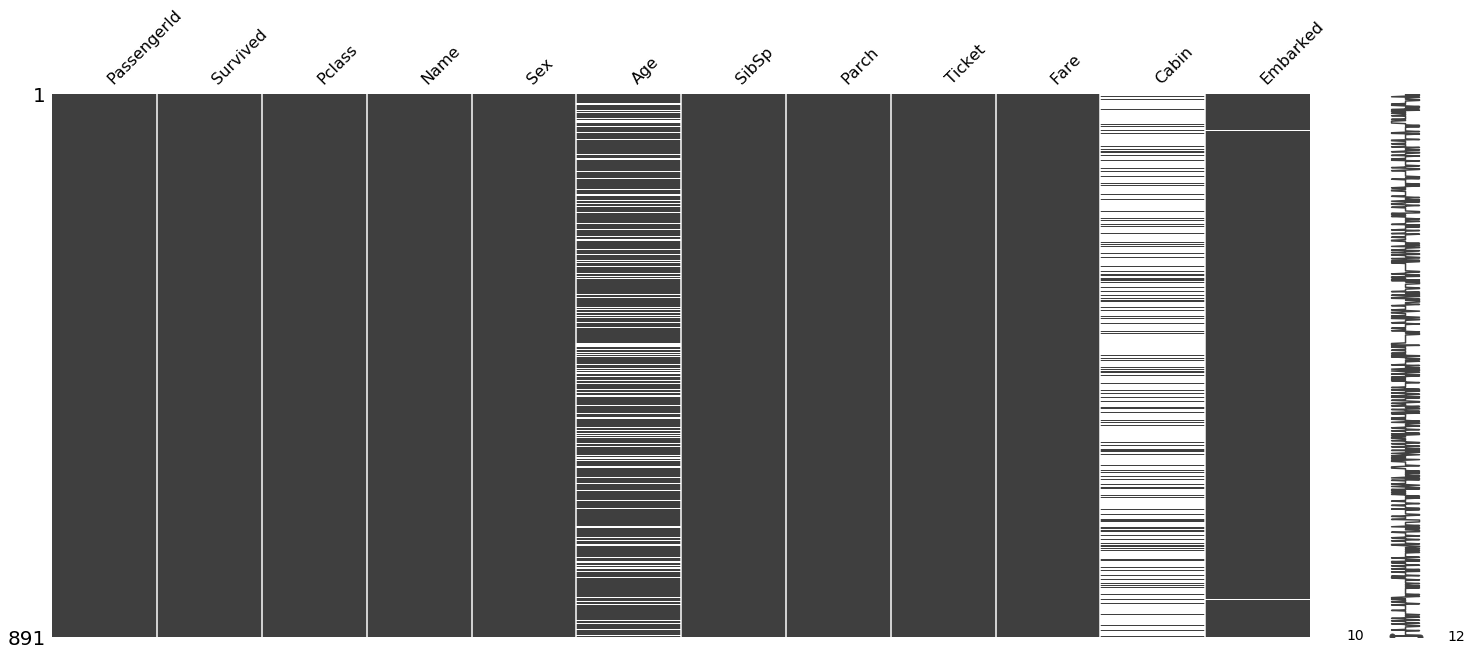

In [13]:
# 右侧的折线图，表示费缺失值的列的数量分布情况 （即12列中最少10列非缺失，最多12列非缺失）
msno.matrix(data_train)  # 看着还是很清楚的

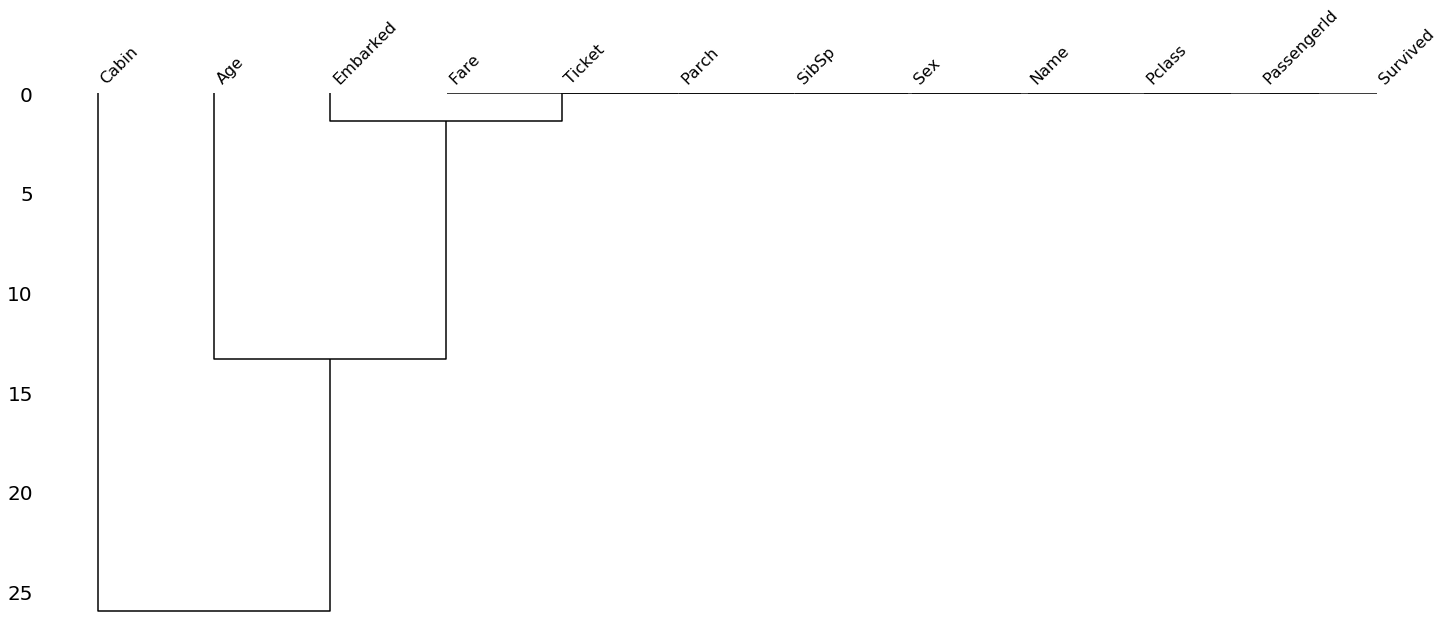

In [30]:
msno.dendrogram(data_train)  
# 树状图是另外一种查看变量缺失相关性的图，其y轴数据反映变量的平均距离，距离越大，说明其缺失的情况越不相关

## 二、数据缺失原因分析

对于缺失值的处理通常按照下面的逻辑进行。
1. 首先明确缺失值的缺失的原因。
    - 数据采集逻辑导致（比如某渠道进来的客户，不需要填写收入，导致收入缺失）
    - 是不是随机因素导致


## 三、缺失值处理

基于不同的原因，采取不同的处理方式。

### 3.1. 删除含有缺失值的Cabin列 
运用 drop/dropna方法， axis =1 时,subset 指定列名

In [37]:
# 运用 drop 方法
temp = data_train.drop('Cabin',axis =1)

In [38]:
temp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [39]:
# 运用dropna方法
temp = data_train.dropna(axis=1) 
temp.shape

(891, 9)

### 3.2. 删除缺失值行 Cabin 缺失的行


In [46]:
temp = data_train.dropna(axis = 0, subset=['Cabin']) 

In [47]:
temp.shape

(204, 12)

### 3.3. 删除超过三个缺失的样本(行)数据 
['Cabin','Age','Embarked']

In [80]:
temp = data_train.dropna(axis = 0,subset=['Cabin','Age','Embarked'],thresh = 2)  
# thresh 表示在subset 中允许(要求)保留 几个非空值

In [79]:
temp.shape

(891, 12)

## 缺失值替换
**<font color=blue>缺失值替换  fillna</font>**<br>

* [Pandas参考文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna)

In [ ]:
d1.count() #非空元素计算
d1.min() #最小值
d1.max() #最大值
d1.idxmin() #最小值的位置，类似于R中的which.min函数
d1.idxmax() #最大值的位置，类似于R中的which.max函数
d1.quantile(0.1) #10%分位数
d1.sum() #求和
d1.mean() #均值
d1.median() #中位数
d1.mode() #众数
d1.var() #方差
d1.std() #标准差
d1.mad() #平均绝对偏差
d1.skew() #偏度
d1.kurt() #峰度
d1.describe() #一次性输出多个描述性统计指标

### step 6. 用均值替换Fare缺失值

In [ ]:
data_train['Fare'].fillna(data_train.Fare.mean(),inplace =True)

### step 7. 用特定值替换Fare缺失值

In [ ]:
_= data_train.fillna(0, inplace=True)  # 用特定值替换

### step 8. 用前一个值值替换Fare缺失值

In [ ]:
# data_train.fillna(method='ffill', limit=2) #用前一个值替换

### step 9. 用replace 标记Age 缺失值为 -1

In [ ]:
data_train['Age'].replace(np.nan,-1)  

### step 10. 用replace 对Age 特定值进行替换(基于列表 和 字典)
0.42: 0 ;-1000: np.nan 

In [ ]:
# 基于字典
data_train['Age'].replace({0.42: 0, -1000: np.nan}) 

In [ ]:
# 基于列表
data_train['Age'].replace([0.42,-1000], [0,np.nan])   

### step11. 基于Initial条件填充Age（粗略）
##Assigning the NaN Values with the Ceil values of the mean ages
Mr:33 \Mrs:36\Master:5\Miss:22\Other:46

In [ ]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46
data.Age.isnull().any() #So no null values left finally   检查是否还有空值

### step 12. 基于连续变量的统计分布填充  
随机random.randint() 抽取 
[#在正负标准差之间选取]

In [36]:
age_avg = data_train['Age'].mean()
age_std = data_train['Age'].std()
age_null_count = data_train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)  

### step 13. 将抽取的数据填充到缺失位置
isnan 是numpy 中的方法
#data['Age'][np.isnan(data['Age'])] = age_null_random_list   # 效果同样
#data['Age'][data['Age'].isnull()]  = age_null_random_list   # 效果同样

In [37]:
data_train['AgeFill']=data_train['Age']
data_train['AgeFill'][data_train.Age.isnull()] = age_null_random_list
data_train['AgeFill'] = data_train['AgeFill'].astype(int)

C:\ProgramData\Anaconda2\envs\gluon_py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### step 14. 离散型变量Embarked-用众数填充  mode()   
中位数median()  -->数值型

#### Embarked

In [ ]:
data['Embarked'].mode()

In [ ]:
data_train['Embarked'].fillna('S',inplace =True)
# data_train['Embarked'].replace({0: np.nan},inplace =True)

In [ ]:
data_train['Embarked'].value_counts(dropna = False)